#  Stacking Ensemble Models — combine both XGBoost + LightGBM + Logistic Regression

In [3]:
#download data from kaggle
!pip install opendatasets --quiet

In [4]:
!pip install shap lime --quiet

In [5]:
!pip install -U scikit-learn==1.7.1

In [6]:
import shap
import joblib
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt

In [7]:
od.download("https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data?select=loan_data.csv")


Skipping, found downloaded files in "./loan-approval-classification-data" (use force=True to force download)


In [8]:
data=pd.read_csv("/content/loan-approval-classification-data/loan_data.csv")

In [12]:
X = data.drop("loan_status", axis=1)
y = data["loan_status"]

In [13]:
# Load your pipeline and data
pipeline = joblib.load("/content/loan_pipeline.pkl")

In [14]:
pipeline.named_steps

{'preprocess': ColumnTransformer(transformers=[('num', StandardScaler(),
                                  ['person_age', 'person_income',
                                   'person_emp_exp', 'loan_amnt',
                                   'loan_int_rate', 'loan_percent_income',
                                   'cb_person_cred_hist_length',
                                   'credit_score']),
                                 ('cat',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore'),
                                  ['person_gender', 'person_education',
                                   'person_home_ownership', 'loan_intent',
                                   'previous_loan_defaults_on_file'])]),
 'model': LogisticRegression()}

In [15]:
# Get transformed feature names from ColumnTransformer
feature_names = pipeline.named_steps['preprocess'].get_feature_names_out()

In [16]:
# Get preprocessed numeric features
X_transformed = pipeline.named_steps['preprocess'].transform(X)
# Convert transformed array back to DataFrame with correct column names
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)

# Step-by-Step Code (Stacking Steps)

In [17]:
# 1. Data Preparation
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.2, random_state=42)


In [18]:
# 2. Build Base Models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
lgbm = LGBMClassifier()
rf = RandomForestClassifier()

In [24]:
# 3. Build Meta Model and Stacking Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

meta_model = LogisticRegression()

stacked_model = StackingClassifier(
    estimators=[('xgb', xgb), ('lgbm', lgbm), ('rf', rf)],
    final_estimator=meta_model,
    passthrough=False
)

stacked_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:48:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1214
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:48:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:48:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:48:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:48:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:48:47] WARNING: /w

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6392, number of negative: 22408
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1208
[LightGBM] [Info] Number of data points in the train set: 28800, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6392, number of negative: 22408
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col

,estimators,"[('xgb', ...), ('lgbm', ...), ...]"
,final_estimator,LogisticRegression()
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None


In [20]:
# 4. Evaluate Model Performance
from sklearn.metrics import classification_report

y_pred = stacked_model.predict(X_test)
print("📊 Stacked Model Performance:")
print(classification_report(y_test, y_pred))

📊 Stacked Model Performance:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6990
           1       0.88      0.81      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [21]:
# 5. Compare with Base Models (Optional)
xgb.fit(X_train, y_train)
print("XGBoost:", classification_report(y_test, xgb.predict(X_test)))

lgbm.fit(X_train, y_train)
print("LightGBM:", classification_report(y_test, lgbm.predict(X_test)))

rf.fit(X_train, y_train)
print("Random Forest:", classification_report(y_test, rf.predict(X_test)))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:44:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost:               precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.80      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7990, number of negative: 28010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1214
[LightGBM] [Info] Number of data points in the train set: 36000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221944 -> initscore=-1.254371
[LightGBM] [Info] Start training from score -1.254371
LightGBM:               pre

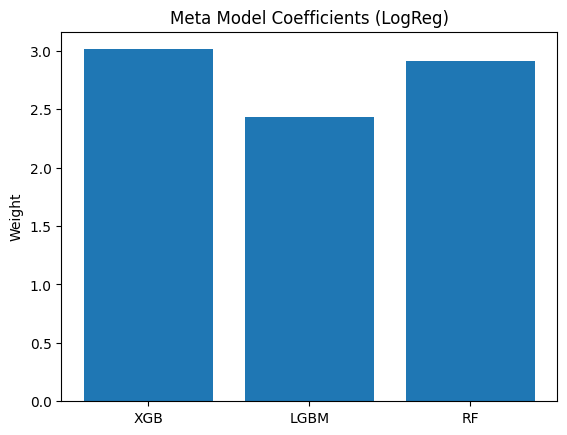

In [27]:
# Visualize Meta Model Weights
import matplotlib.pyplot as plt
import numpy as np

n_base_models = 3
base_model_coef = coef[:n_base_models]
original_feat_coef = coef[n_base_models:]

plt.bar(["XGB", "LGBM", "RF"], base_model_coef)
plt.title("Meta Model Coefficients (LogReg)")
plt.ylabel("Weight")
plt.show()
